In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Node Iterator & Compact Forward

In [13]:
result = pd.read_csv('output/node_iterator_compact_forward_results.csv', delimiter=',')

In [ ]:
result.loc[result['algorithm'] == 'Compact Forward']

In [ ]:
result.loc[result['algorithm'] == 'Node Iterator']

In [ ]:
# Get unique algorithms and datasets
algorithms = result['algorithm'].unique()
datasets = result['dataset'].unique()

bar_height = 0.3
y = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot each algorithm's execution time for each dataset
for i, alg in enumerate(algorithms):
    execution_times = [
        result[(result['algorithm'] == alg) & (result['dataset'] == dataset)]['execution_time'].values[0]
        for dataset in datasets
    ]
    bars = plt.barh(y + i * bar_height, execution_times, height=bar_height, label=alg)
    
    # Add text annotations for each bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f'{bar.get_width():.1f}',  # Format the value
            va='center',
            fontsize=9
        )

# Customize the chart
plt.ylabel('Dataset')
plt.xlabel('Execution Time (ms)')
plt.title('Execution Time for Each Algorithm and Dataset')
plt.yticks(y + bar_height, datasets)
plt.legend(title="Algorithm", loc="upper right")

plt.tight_layout()
plt.show()

Show the plot for triangle operations per dataset and algorithm

In [ ]:
# Get unique algorithms and datasets
algorithms = result['algorithm'].unique()
datasets = result['dataset'].unique()

bar_height = 0.3
y = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot each algorithm's execution time for each dataset
for i, alg in enumerate(algorithms):
    execution_times = [
        result[(result['algorithm'] == alg) & (result['dataset'] == dataset)]['triangle_operations'].values[0]
        for dataset in datasets
    ]
    bars = plt.barh(y + i * bar_height, execution_times, height=bar_height, label=alg)
    
    # Add text annotations for each bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f'{bar.get_width():.1f}',  # Format the value
            va='center',
            fontsize=9
        )

# Customize the chart
plt.ylabel('Dataset')
plt.xlabel('Execution Time (ms)')
plt.title('Execution Time for Each Algorithm and Dataset')
plt.yticks(y + bar_height, datasets)
plt.legend(title="Algorithm", loc="upper right")

plt.tight_layout()
plt.show()

Find average execution time and triangle operations

In [ ]:
average_execution_time = result.groupby('algorithm')['execution_time'].mean().reset_index()
print(average_execution_time)
 
print('\n')

average_triangle_operations = result.groupby('algorithm')['triangle_operations'].mean().reset_index()
print(average_triangle_operations)

## Plots for presentation

In [ ]:
# keep only the five datasets with the most triangles
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']

mask = result['dataset'].isin(most_triangles_datasets)
presentation_df = result[mask]

In [ ]:
# Get unique algorithms and datasets
algorithms = presentation_df['algorithm'].unique()
datasets = presentation_df['dataset'].unique()

bar_height = 0.3
y = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot each algorithm's execution time for each dataset
for i, alg in enumerate(algorithms):
    execution_times = [
        presentation_df[(presentation_df['algorithm'] == alg) & (presentation_df['dataset'] == dataset)]['execution_time'].values[0]
        for dataset in datasets
    ]
    bars = plt.barh(y + i * bar_height, execution_times, height=bar_height, label=alg)
    
    # Add text annotations for each bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f'{bar.get_width():.1f}',  # Format the value
            va='center',
            fontsize=9
        )

# Customize the chart
plt.ylabel('Dataset')
plt.xlabel('Execution Time (ms)')
plt.title('Execution Time for Each Algorithm and Dataset')
plt.yticks(y + bar_height, datasets)
plt.legend(title="Algorithm", loc="upper right")

plt.tight_layout()
plt.show()

## Doulion

In [ ]:
doulion_results = pd.read_csv('output/doulion_results.csv', delimiter=',')

In [ ]:
doulion_results.loc[doulion_results['algorithm'] == 'Compact Forward']

In [ ]:
doulion_results.loc[doulion_results['algorithm'] == 'Node Iterator']

Get triangles that Doulion expects the original graph to have per dataset

In [ ]:
# Group by dataset and p, then aggregate the triangles column
grouped = doulion_results.loc[doulion_results['algorithm'] == 'Node Iterator'].groupby(['dataset', 'p'])['triangles'].sum().unstack()

# Display the results
print("Triangles for each dataset across different p values:")
print(grouped)

Calculate average loss per p value

In [ ]:
# Calculate the average absolute loss for each p value
average_absolute_loss = doulion_results.loc[doulion_results['algorithm'] == 'Node Iterator'].groupby("p").apply(
    lambda group: (group["initial_graph_triangles"] - group["triangles"]).abs().mean()
)

# Print the results
print("Average Absolute Loss for each p value:")
print(average_absolute_loss)

In [ ]:
node_iterator_results = doulion_results.sort_values(by=["dataset", "p"])
node_iterator_results = node_iterator_results[node_iterator_results['algorithm'] == 'Node Iterator']

# Get the unique datasets and p values
datasets = node_iterator_results["dataset"].unique()
p_values = [0.1, 0.3, 0.5, 0.7]

# Create the plot
plt.figure(figsize=(12, 8))
for dataset in datasets:
    dataset_data = node_iterator_results[node_iterator_results["dataset"] == dataset]
    plt.plot(dataset_data["p"], dataset_data["execution_time"], marker='o', label=dataset)

# Customizing the plot
plt.title("Execution Time vs. p Values for Different Datasets (Node Iterator)", fontsize=16)
plt.xlabel("p Values", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.xticks(p_values, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Datasets", fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

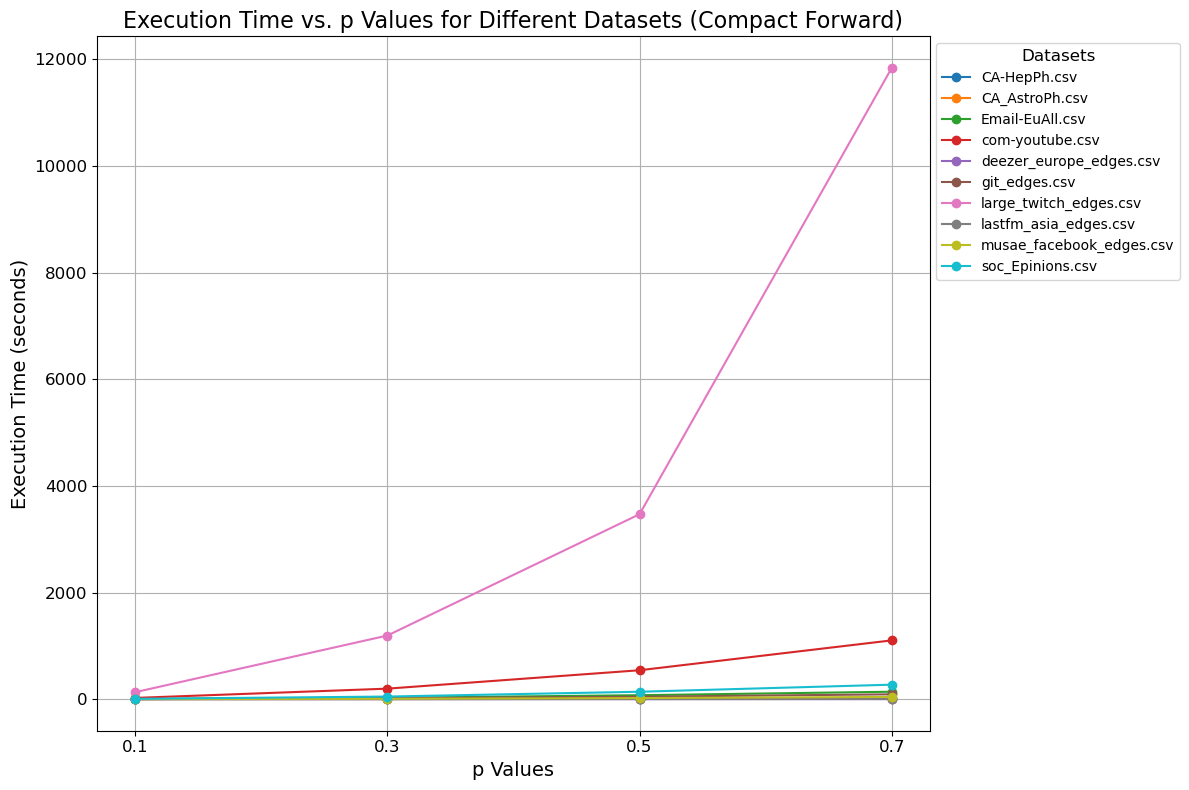

In [27]:
compact_results = doulion_results.sort_values(by=["dataset", "p"])
compact_results = compact_results[compact_results['algorithm'] == 'Node Iterator']

# Get the unique datasets and p values
datasets = compact_results["dataset"].unique()
# Create the plot
plt.figure(figsize=(12, 8))
for dataset in datasets:
    dataset_data = compact_results[compact_results["dataset"] == dataset]
    plt.plot(dataset_data["p"], dataset_data["execution_time"], marker='o', label=dataset)

# Customizing the plot
plt.title("Execution Time vs. p Values for Different Datasets (Compact Forward)", fontsize=16)
plt.xlabel("p Values", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.xticks(p_values, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Datasets", fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [28]:
avg_execution_time = doulion_results.groupby(['algorithm', 'p'])['execution_time'].mean().reset_index()

# Display results
print(avg_execution_time)

         algorithm    p  execution_time
0  Compact Forward  0.1       11.806769
1  Compact Forward  0.3      107.037454
2  Compact Forward  0.5      308.943250
3  Compact Forward  0.7      688.525997
4    Node Iterator  0.1       16.817329
5    Node Iterator  0.3      150.593320
6    Node Iterator  0.5      430.744710
7    Node Iterator  0.7     1352.048618


In [ ]:
triest_results = pd.read_csv('output/triest_results.csv', delimiter=',')

In [ ]:
datasets = triest_results['dataset']
ground_truth = [3358499, 1351441, 267313, 3056386, 45034, 523810, 54148895, 40433, 794953, 1624481]
estimations = triest_results['Global Triangle Estimation']


x = np.arange(len(datasets))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
g_bars =ax.barh(x - width/2, ground_truth, width, label='Ground Truth', color='black')
e_bars = ax.barh(x + width/2, estimations, width, label='Estimation', color='orange')

ax.set_ylabel('Datasets')
ax.set_xlabel('Triangle Counts')
ax.set_title('Triest: Ground Truth vs Global Estimation')
ax.set_yticks(x)
ax.set_yticklabels(datasets, rotation=0)
ax.legend()
for bar in g_bars:
    width = bar.get_width()
    offset = width * 0.05
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width}',
             ha='left',
             va='center')

for bar in e_bars:
    width = bar.get_width()
    offset = width * 0.05
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width}',
             ha='left',
             va='center')


plt.tight_layout()
plt.show()
